# Keras

Keras es una biblioteca para manipular redes neuronales. Es una capa de alto nivel por arriba de Theano (o de TensorFlow).

## Ejemplo simple

Construcción de una red neuronal:

In [165]:
%matplotlib inline
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()
model.add(Dense(output_dim=2, input_dim=5, activation="sigmoid"))
model.add(Dense(output_dim=1, activation="sigmoid"))

Podemos ver una descripción del modelo:

In [166]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_23 (Dense)                 (None, 2)             12          dense_input_12[0][0]             
____________________________________________________________________________________________________
dense_24 (Dense)                 (None, 1)             3           dense_23[0][0]                   
Total params: 15
____________________________________________________________________________________________________


Así como también podemos visualizarlo:

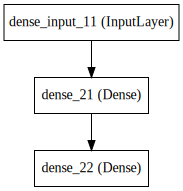

In [156]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Luego hay que compilar:

In [157]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Usamos un conjunto de datos de ejemplo:

In [158]:
import numpy as np

def dataset(n_train, n_test):
    n = n_train + n_test
    points = np.random.uniform(-3, 3, [n, 2])
    features = np.c_[points, points[:, 0]**2, points[:, 1]**2, points[:, 0] * points[:, 1]]
    labels = (np.linalg.norm(points, axis=1) > 2).astype(int)
    return (features[:n_train], labels[:n_train]), (features[n_train:], labels[n_train:])

(X_train, y_train), (X_test, y_test) = dataset(8000, 2000)

Entrenamos la red:

In [159]:
model.fit(X_train, y_train, nb_epoch=50, batch_size=32)

Epoch 1/50
8000/8000 [==============================] - 0s - loss: 0.6011 - acc: 0.6485     
Epoch 2/50
8000/8000 [==============================] - 0s - loss: 0.5935 - acc: 0.6485     
Epoch 3/50
8000/8000 [==============================] - 0s - loss: 0.5863 - acc: 0.6485     
Epoch 4/50
8000/8000 [==============================] - 0s - loss: 0.5785 - acc: 0.6485     
Epoch 5/50
8000/8000 [==============================] - 0s - loss: 0.5698 - acc: 0.6485     
Epoch 6/50
8000/8000 [==============================] - 0s - loss: 0.5601 - acc: 0.6485     
Epoch 7/50
8000/8000 [==============================] - 0s - loss: 0.5494 - acc: 0.6485     
Epoch 8/50
8000/8000 [==============================] - 0s - loss: 0.5375 - acc: 0.6656     
Epoch 9/50
8000/8000 [==============================] - 0s - loss: 0.5241 - acc: 0.7009     
Epoch 10/50
8000/8000 [==============================] - 0s - loss: 0.5093 - acc: 0.7290     
Epoch 11/50
8000/8000 [==============================] - 0s - loss: 0

Podemos evaluar y ver métricas:

In [160]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print()
print()
print('Valor de la función de costo: {}'.format(loss_and_metrics[0]))
print('Acierto: {}'.format(loss_and_metrics[1]))

1312/2000 [==================>...........] - ETA: 0s

Valor de la función de costo: 0.137257861495018
Acierto: 0.985


Y también podemos ver las clases predecidas y sus probablidades:

In [161]:
y_pred = model.predict_classes(X_test)
probability = model.predict_proba(X_test)

print(y_pred)
print(probability)

  32/2000 [..............................] - ETA: 0s[[1]
 [1]
 [1]
 ..., 
 [1]
 [1]
 [1]]
[[ 0.96887499]
 [ 0.96947777]
 [ 0.9470194 ]
 ..., 
 [ 0.96037537]
 [ 0.9621622 ]
 [ 0.92221588]]


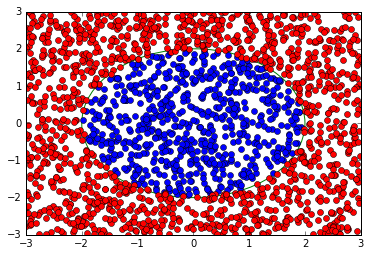

In [164]:
import matplotlib.pyplot as plt

def plot(inside, outside):
    if inside.any():
        plt.plot(inside[:, 0], inside[:, 1], 'bo')
    if outside.any():
        plt.plot(outside[:, 0], outside[:, 1], 'ro')
    circle = plt.Circle((0, 0), radius=2, color='g', fill=False)
    plt.gca().add_patch(circle)
    plt.show()

points_test = X_test[:, :2]

inside = np.array([x for x, y in zip(points_test, y_pred) if y == 0])
outside = np.array([x for x, y in zip(points_test, y_pred) if y == 1])

plot(inside, outside)